We want to create our first NN from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

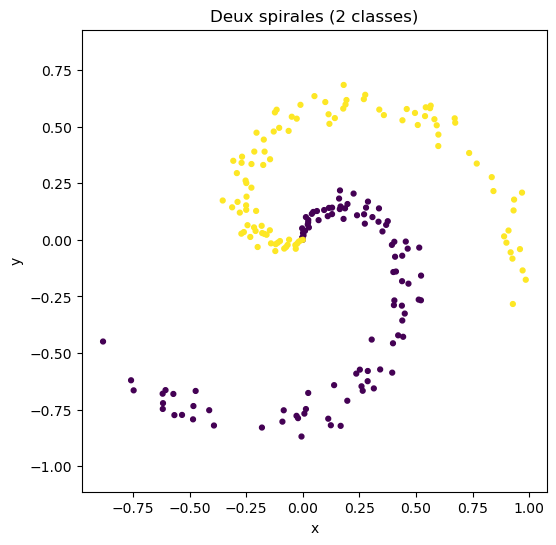

In [3]:
N = 100   # points per class
D = 2     # dimensionality
K = 2     # number of classes

X = np.zeros((N*K, D))
Y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    r = np.linspace(0.0, 1, N)              # radius
    t = np.linspace(j*4, (j+1)*4, N)        # angle
    t += np.random.randn(N) * 0.2           # optional noise

    ix = range(j*N, (j+1)*N)
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j

yc = np.zeros((N*K, K))
yc[np.arange(N*K), Y] = 1

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=Y, s=12)
plt.title("Deux spirales (2 classes)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

We are choising a hidden layer of h=100 neurons

In [39]:
h = 5
# Initiallising the weight and of each nodes
W0 = np.random.randn(D,h)
W1 = np.random.randn(h,K)
b0 = np.random.randn(h, 1)
b1 = np.random.randn(K, 1)
print(W0)
# For example calculation of the second node in hidden layer :
X_1 = 0
X_2 = 1
yL1_node2 = np.dot([X_1, X_2], W0[:,1])
yL1_node2

[[ 0.84205414  1.44531652 -1.3406728  -0.45593157  1.2240055 ]
 [-0.01320791  1.26994615 -0.26991157  0.85141327 -0.96983177]]


1.269946148657464

In [ ]:
# Now we try to implement the all code.
h = 5
W0 = np.random.randn(D,h) * 0.1
W1 = np.random.randn(h,K) * 0.1
b0 = np.random.randn(1, h)
b1 = np.random.randn(1, K)
learning_rate = 0.1
n_descent = 10
LOSS = []

def relu(x):
    return np.maximum(0.0, x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output > 0] = 1
    return output

for i in range(n_descent):
    # Computing the output value
    m0 = np.dot(X, W0)
    mb0= m0 + b0
    
    a0 = relu(mb0)

    m1 = np.dot(a0, W1)
    mb1= m1 + b1
    a1 = mb1

    # Compute the loss function
    loss = 1/2/N * np.sum((a1 - yc)**2)

    # Improve all weights
    

[[ 0.27266701 -1.08388653  1.3757413   0.32956477 -0.31204634]]
[-5.88015397e-04 -1.30590958e-03 -7.71425893e-05 -1.06400509e-03
  1.27196647e-03] [ 0.272079   -1.08519244  1.37566416  0.32850077 -0.31077437]


In [54]:
h = 100
W0 = np.random.randn(D,h) * 0.1
W1 = np.random.randn(h,K) * 0.1
b0 = np.zeros((1, h))
print(b0)
b1 = np.zeros((1, K))
learning_rate = 0.01

LOSS = []

def relu(x):
    return np.maximum(0.0, x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output > 0] = 1
    return output

for i in range(10000):

    # 1.layer
    m0 = np.dot(X, W0)
    mb0 = m0 + b0
    a0 = relu(mb0)


    m1 = np.dot(a0, W1)
    # a1 = m1              # We forget the biais to simplify the function
    a1 = m1 + b1       # No softmax for this easiest algorithm 

    loss = 1/(N*2) * np.sum(a1 - yc)**2    

    if i % 100 == 0 :
        print("Step", i, ": loss =", loss)
    
    dLda1 = (a1 - yc) / N
    dLdW1 = np.dot(a0.T, dLda1)
    dLdb1 = np.sum(dLda1, axis=0, keepdims=True)

    da0dmb0 = relu_derivative(mb0)
    dLda0 = np.dot(dLda1, W1.T)
    dLdmb0 = dLda0 * da0dmb0
    dLdW0 = np.dot(X.T, dLdmb0)
    dLdb0 = np.sum(dLdmb0, axis=0, keepdims=True)

    W1 -= learning_rate * dLdW1
    b1 -= learning_rate * dLdb1
    W0 -= learning_rate * dLdW0
    b0 -= learning_rate * dLdb0
    LOSS.append(loss)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Step 0 : loss = 210.5223895547146
Step 100 : loss = 0.7707917310799168
Step 200 : loss = 0.01203256897671216
Step 300 : loss = 0.0008673422900402819
Step 400 : loss = 0.0001569922224437174
Step 500 : loss = 3.866061384710957e-05
Step 600 : loss = 0.00013155723257683144
Step 700 : loss = 0.00022799185830803254
Step 800 : loss = 0.00018405286963239052
Step 900 : loss = 0.0001170059907696755
Step 1000 : loss = 6.252107667022272e-05
Step 1100 : loss = 5.7412846241970993e-05
Step 1200 : loss = 5.2824245881324064e-05
Step 1300 : loss = 1.5911715484272232e-05
Step 1400 : loss = 6.494964779975578e-06
Step 1500 : loss = 3.605982554786038e-06
Step 1600 : loss = 2.5069365646883305e-06
Step 

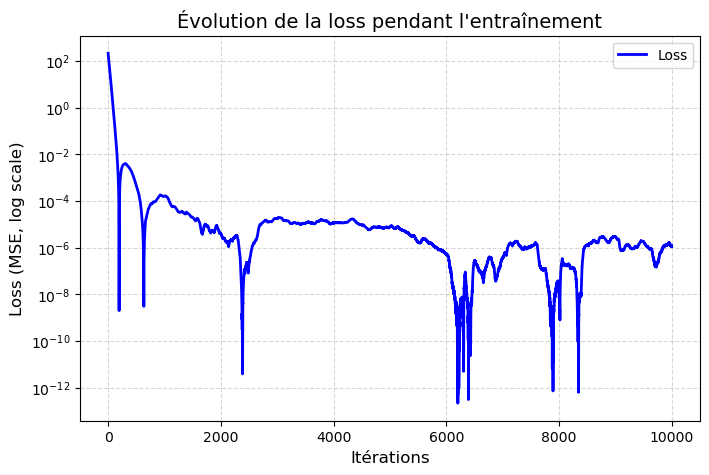

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(np.arange(len(LOSS)), LOSS, color='blue', linewidth=2, label='Loss')
plt.title("Évolution de la loss pendant l'entraînement", fontsize=14)
plt.xlabel("Itérations", fontsize=12)
plt.ylabel("Loss (MSE, log scale)", fontsize=12)
plt.yscale('log')  # axe Y en échelle logarithmique
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()